In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
# Get constants
with open("params_train.json", 'r') as file:
    params = json.load(file)

agent_name      = params['training']['AGENT_NAME']
model_name      = params['training']['MODEL_NAME']
training_rounds = params['training']['TRAINING_ROUNDS']
scenario        = params['training']['SCENARIO']
old_model       = params['training']['START_TRAINING_WITH']

alpha  = params['Q-update']['ALPHA']
gamma  = params['Q-update']['GAMMA']
mode   = params['Q-update']['MODE']
n_step = params['Q-update']['N']


# Print training trivia
train_str = f"Trained 'agent_{agent_name}_{model_name}' in '{scenario}' for {training_rounds} rounds "
if old_model == "RESET":
    train_str += f"from scratch."
else:
    train_str += f"starting with '{old_model}'."
print(train_str)
print(f"Performed Q-update in {n_step}-step {mode} mode.  (alpha = {alpha}, gamma = {gamma})")

Trained 'agent_h7_sec-agent-DQ' in 'loot-box' for 3000 rounds from scratch.
Performed Q-update in 5-step SARSA mode.  (alpha = 0.1, gamma = 1)


In [3]:
# All possible features
all_direction_features = np.array(
    [
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 1],
        [0, 1, 1, 1],
        [1, 1, 1, 1],
        [0, 0, 0, 2],
        [0, 0, 1, 2],
        [0, 1, 1, 2],
        [1, 1, 1, 2],
        [0, 0, 2, 2],
        [0, 1, 2, 2],
        [1, 1, 2, 2],
        [0, 2, 2, 2],
        [1, 2, 2, 2],
        [2, 2, 2, 2],   
    ]
)
all_own_spot_features  = np.array([0, 1, 2])
all_mode_features      = np.array([0, 1, 2])  

### Evaluating the trained model

In [4]:
trained_model = np.load(f"model_{agent_name}_{model_name}.npy")
Sa_counter    = np.load(f"sa_counter_{agent_name}_{model_name}.npy")
policy        = np.argmax(trained_model, axis = -1)

In [5]:
def look_up_q_tensor(f5 = 1):
    print(f"Q-Tensor for case (f5 = {f5}):")
    print(f"state  direction features   policy  trained model  {'':20}number of encounters")
    for i in range(len(all_direction_features)):
        line = f"{i:2}{'':2}{all_direction_features[i]} {[f5]}{'':2}{policy[i, f5]}{'':2}["
        for Q_value in trained_model[i, f5]:
            line += f"{Q_value:-7.1f}"
        line += f"]  {np.sum(Sa_counter[i, f5]):5} ["
        for count in Sa_counter[i, f5]:
            line += f" {count:5}"
        line += f"]"
        print(line)

In [6]:
look_up_q_tensor(f5 = 0)

Q-Tensor for case (f5 = 0):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [0]  4  [   -4.0   -3.9   -4.3   -3.9   -3.9   -4.4]   2708 [   546   646   174   207   967   168]
 1  [0 0 0 1] [0]  3  [   -2.8   -1.7   -0.2  126.9   -0.8   -0.4]   1486 [    17    20    10  1412    21     6]
 2  [0 0 1 1] [0]  2  [    0.0    0.0  124.9    0.0    0.0    0.0]    201 [     0     0   197     1     2     1]
 3  [0 1 1 1] [0]  3  [    0.0    0.0    0.0    6.3    0.0   -0.4]      8 [     0     0     0     7     0     1]
 4  [1 1 1 1] [0]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0     0     0     0     0]
 5  [0 0 0 2] [0]  3  [   -4.7   -4.9   -4.6  127.2   -3.5   -4.3]  15465 [    93    99   151 14829   209    84]
 6  [0 0 1 2] [0]  3  [   -0.6   -0.1    0.2  116.1   -0.8   -1.1]    501 [     6     6     6   464    12     7]
 7  [0 1 1 2] [0]  3  [    0.0    0.2    0.0   80.6    0.0    0.0]     61 [     0     1  

In [7]:
look_up_q_tensor(f5 = 1)

Q-Tensor for case (f5 = 1):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [1]  1  [    0.0    0.5   -0.4   -0.5   -0.4   -1.2]     10 [     1     2     2     1     1     3]
 1  [0 0 0 1] [1]  3  [   -0.7   -0.7   -1.6  126.1   -0.2   -1.0]    561 [     6     5    10   481    53     6]
 2  [0 0 1 1] [1]  2  [   -0.5   -0.0   64.2    0.0    0.0    0.0]     50 [     1     1    47     0     1     0]
 3  [0 1 1 1] [1]  4  [    0.0    0.0   -0.5    0.0   17.6   -0.3]     17 [     0     0     1     0    13     3]
 4  [1 1 1 1] [1]  1  [    0.0    6.6    0.0    0.0    0.0    2.1]      9 [     0     7     0     1     0     1]
 5  [0 0 0 2] [1]  3  [   58.1   46.9   68.6  130.9   76.0   63.2]  60123 [   325   329   297 48536  9724   912]
 6  [0 0 1 2] [1]  3  [   80.1   91.6   98.3  133.2   91.4   79.7]  139911 [  2000  9059  5609 105383 16959   901]
 7  [0 1 1 2] [1]  3  [   45.8   39.0   48.4  132.0   46.9   55.8]  30603 [    84   247

In [8]:
look_up_q_tensor(f5 = 2)

Q-Tensor for case (f5 = 2):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [2]  1  [   -1.8  125.7    4.0   -0.1   -0.3    0.1]    867 [    18   811     5    21     6     6]
 1  [0 0 0 1] [2]  5  [    7.1    7.8    8.8   10.1   14.8  128.8]   7581 [    88   107    94   596   176  6520]
 2  [0 0 1 1] [2]  5  [   23.3   18.9   45.6   31.6   12.0  130.7]  10820 [    53   509   160    54    91  9953]
 3  [0 1 1 1] [2]  5  [   12.2   18.8   13.1   15.9   12.9  125.1]   4741 [    64    61    13    18    15  4570]
 4  [1 1 1 1] [2]  5  [    1.0    0.6    0.4    1.2    9.7  127.0]    959 [    71    72    62    76    69   609]
 5  [0 0 0 2] [2]  5  [   -0.5   -0.5   -0.3   -0.4   -0.7   36.6]     34 [     1     1     1     1     3    27]
 6  [0 0 1 2] [2]  3  [    0.8    0.0   -0.1   57.6    0.0    0.4]    584 [   555     1     3    20     2     3]
 7  [0 1 1 2] [2]  3  [    4.1    4.6    5.4    8.4    4.4    0.0]      9 [     1     1  

## Looking at the training process

### Training performance over rounds

In [9]:
def moving_average (x, w):
    """
    from https://newbedev.com/how-to-calculate-rolling-moving-average-using-numpy-scipy
    """
    return np.convolve(x, np.ones(w), 'valid') / w

In [10]:
with open("results_train.json", 'r') as file:
    training_results = json.load(file)

In [11]:
number_of_rounds = training_results['by_agent'][f"agent_{agent_name}"]['rounds']
round_list       = list(training_results['by_round'])
rounds           = np.arange(number_of_rounds) + 1
collected_coins  = np.zeros(number_of_rounds, dtype = int)
round_lengths    = np.zeros(number_of_rounds, dtype = int)
kills            = np.zeros(number_of_rounds, dtype = int)
suicides         = np.zeros(number_of_rounds, dtype = int)
died             = np.zeros(number_of_rounds, dtype = int)
invalid_moves    = np.zeros(number_of_rounds, dtype = int)

for round_name in round_list:
    round_dict             = training_results['by_round'][round_name]
    round                  = round_dict['round'] - 1   # round index
    collected_coins[round] = round_dict['coins'][0]
    round_lengths[round]   = round_dict['steps']
    kills[round]           = round_dict['kills'][0]
    suicides[round]        = round_dict['suicides'][0]
    died[round]            = round_dict['got killed'][0]
    invalid_moves[round]   = round_dict['invalid'][0]


In [12]:
survived        = 1 - died
was_killed      = died - suicides
steps_survived  = np.where(died, round_lengths, 400)

In [13]:
avg_length   = 50   # number of rounds to average over

kill_rate           = moving_average(kills, avg_length)
suicide_rate        = moving_average(suicides, avg_length)
was_killed_rate     = moving_average(was_killed, avg_length)
died_rate           = moving_average(died, avg_length)
steps_survived_rate = moving_average(steps_survived, avg_length)


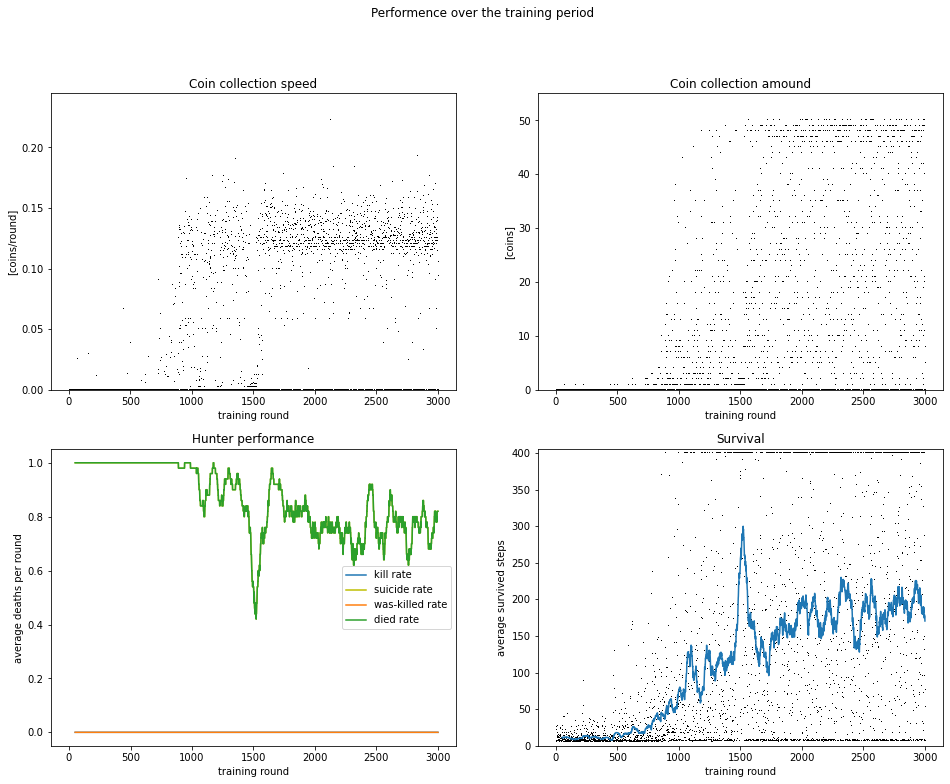

In [14]:
plt.figure(figsize = (16,12))
plt.suptitle("Performence over the training period")

plt.subplot(2, 2, 1)
speed = collected_coins / round_lengths
plt.plot(rounds, speed, ',k')
plt.ylim((0, 1.1*max(speed)))
plt.title("Coin collection speed")
plt.ylabel("[coins/round]")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")

plt.subplot(2, 2, 2)
plt.plot(rounds, collected_coins, ',k')
plt.ylim((0, 1.1*max(collected_coins)))
plt.title("Coin collection amound")
plt.ylabel("[coins]")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")

plt.subplot(2, 2, 3)
plt.plot(rounds[avg_length-1:], kill_rate, label = "kill rate")
plt.plot(rounds[avg_length-1:], suicide_rate, 'y', label = "suicide rate")
plt.plot(rounds[avg_length-1:], was_killed_rate, label = "was-killed rate")
plt.plot(rounds[avg_length-1:], died_rate, label = "died rate")
plt.xlim(-0.05*number_of_rounds, 1.05*number_of_rounds)
plt.title("Hunter performance")
plt.ylabel("average deaths per round")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(rounds, steps_survived, ',k')
plt.plot(rounds[avg_length-1:], steps_survived_rate)
plt.ylim(0, 405)
plt.xlim(-0.05*number_of_rounds, 1.05*number_of_rounds)
plt.title("Survival")
plt.ylabel("average survived steps")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")

plt.show()



In [15]:
def analyze_action():
    title_str = "Evolution of actions"
    
    Q_action = np.mean(allQs, axis = (1,2))
    labels  = ["action 0", "action 1", "action 2", "action 3", "WAIT", "BOMB"]

    plt.plot(np.arange(number_of_rounds) + 1, Q_action, label = labels)
    plt.title(title_str)
    plt.ylabel("Mean Q-value")
    plt.xlabel("training round")
    plt.legend()
    plt.show()

In [16]:
def analyze_state (state):
    state_index, f5 = state
    Q_state = allQs[:, state_index, f5]
    labels  = ["action 0", "action 1", "action 2", "action 3", "WAIT", "BOMB"]

    plt.plot(np.arange(training_rounds) + 1, Q_state, label = labels)
    plt.title(f"Evolution of policies in state {state}")
    plt.ylabel("Q-value")
    plt.xlabel("training round")
    plt.legend()
    plt.show()

### Evolution of the Q-model

In [17]:
allQs = np.load("Qtrain.npy")

ValueError: x and y must have same first dimension, but have shapes (3000,) and (30, 6)

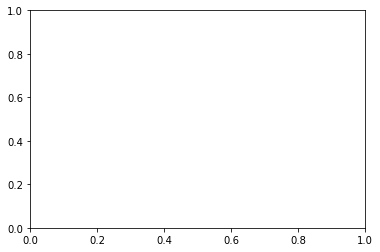

In [18]:
analyze_action()

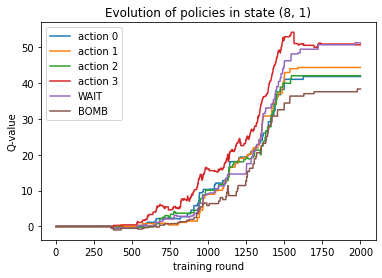

In [ ]:
analyze_state((8, 1))

In [ ]:
look_up_q_tensor(0)

Q-Tensor for case (f5 = 0):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [0]  4  [   -6.4   -6.4   -6.3   -6.2   -6.2   -6.3]   2002 [   166   148   181   134  1243   130]
 1  [0 0 0 1] [0]  3  [   -3.9   -5.2   -4.6   44.3   -4.1   -6.0]   1690 [    35    58    35  1471    43    48]
 2  [0 0 1 1] [0]  2  [    0.0    0.0   49.5   -0.6   -0.9   -0.5]    277 [     4     3   260     1     8     1]
 3  [0 1 1 1] [0]  1  [   -0.5    5.0    0.0    0.0    0.0    0.0]      3 [     1     1     0     0     1     0]
 4  [1 1 1 1] [0]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0     0     0     0     0]
 5  [0 0 0 2] [0]  3  [   -6.8   -6.8   -6.8   44.8   -6.0   -6.8]   4472 [   103    91    99  3996   105    78]
 6  [0 0 1 2] [0]  3  [   -3.3   -3.7   -1.1   48.2   -1.1   -2.1]    571 [    21    10    14   509     9     8]
 7  [0 1 1 2] [0]  3  [    0.0    1.1    0.0   42.1    0.0    0.0]     43 [     1     1  